In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import imutils.paths as path
from tqdm import tqdm

In [380]:
PATH = 'data_train'
imagePaths = sorted(list(path.list_images(PATH)))

In [381]:
data = []
for i in tqdm(imagePaths,desc="load"):
    imgg=cv.imread (i)
    img = cv.imread(i, cv.IMREAD_GRAYSCALE)
    a = cv.resize (img, (128, 128))
    data.append (a)

load: 100%|██████████████████████████████████████████████████████████████████████████| 220/220 [00:02<00:00, 84.76it/s]


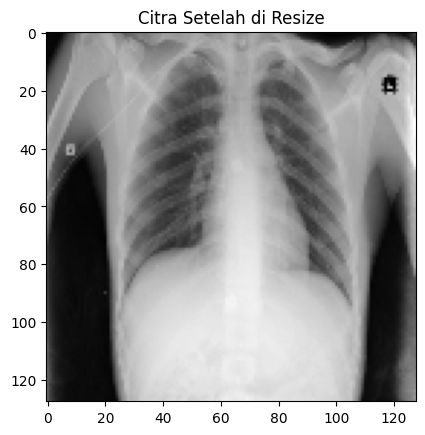

In [382]:
# Menampilkan visualisasi citra setelah diresize
if data:
    sample_image = data[2]

    # Menampilkan gambar
    plt.imshow(sample_image, cmap='gray')
    plt.title('Citra Setelah di Resize')
    plt.show()
else:
    print("Daftar data kosong. Tidak ada citra untuk ditampilkan.")

In [383]:
 def derajat0 (img):
        # Menghitung nilai piksel maksimum dalam citra
        max = np.max(img)
        
        # Inisialisasi matriks nol dengan ukuran (max+1) x (max+1)
        imgTmp=np.zeros([max+1,max+1])
        
        # Iterasi melalui piksel-piksel citra
        for i in range (len(img)):
            for j in range (len(img[i])-1):
                
                 # Menghitung pasangan nilai intensitas piksel dan menyimpannya dalam imgTmp
                imgTmp[img[i,j],img[i,j+1]] +=1
                
        # Menghitung transpos matriks imgTmp        
        transpos= np.transpose(imgTmp)
        
        # Menjumlahkan matriks imgTmp dengan transpos-nya
        data= imgTmp+transpos
        
        # Menghitung total elemen dalam matriks data
        tmp=0
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j]
        # Normalisasi matriks data dengan membagi setiap elemen oleh total elemen        
        for i in range (len (data)):
            for j in range(len (data)):
                data[i,j]/=tmp
                
        # Mengembalikan matriks hasil normalisasi
        return data

In [384]:
def derajat45 (img):
    # Menghitung nilai piksel maksimum dalam citra
    max = np.max(img)
    # Inisialisasi matriks nol dengan ukuran (max_val + 1) x (max_val + 1)
    imgTmp=np.zeros([max+1, max+1])
    # Iterasi melalui piksel-piksel citra
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            # Menghitung pasangan nilai intensitas piksel dan menyimpannya dalam imgTmp
            imgTmp[img[i+1,j],img[i,j+1]] += 1
    # Menghitung transpos matriks imgTmp        
    transpos= np.transpose(imgTmp)
    # Menjumlahkan matriks imgTmp dengan transpos-nya
    data= imgTmp+transpos
    # Menghitung total elemen dalam matriks data
    tmp=0 
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    # Normalisasi matriks data dengan membagi setiap elemen oleh total elemen    
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    # Mengembalikan matriks hasil normalisasi        
    return data        

In [385]:
def derajat90 (img):
    # Menghitung nilai piksel maksimum dalam citra
    max = np.max(img)
    # Inisialisasi matriks nol dengan ukuran (max_val + 1) x (max_val + 1)
    imgTmp=np.zeros([max+1, max+1])
    # Iterasi melalui piksel-piksel citra
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            # Menghitung pasangan nilai intensitas piksel dan menyimpannya dalam imgTmp
            imgTmp[img[i+1,j],img[i,j+1]] += 1
    # Menghitung transpos matriks imgTmp         
    transpos= np.transpose(imgTmp)
    # Menjumlahkan matriks imgTmp dengan transpos-nya
    data= imgTmp+transpos
    # Menghitung total elemen dalam matriks data
    tmp=0 
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    # Normalisasi matriks data dengan membagi setiap elemen oleh total elemen        
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    # Mengembalikan matriks hasil normalisasi
    return data        

In [386]:
def derajat135 (img):
    # Menghitung nilai piksel maksimum dalam citra
    max = np.max(img)
    # Inisialisasi matriks nol dengan ukuran (max_val + 1) x (max_val + 1)
    imgTmp=np.zeros([max+1, max+1])
    # Iterasi melalui piksel-piksel citra
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            # Menghitung pasangan nilai intensitas piksel dan menyimpannya dalam imgTmp
            imgTmp[img[i+1,j],img[i,j+1]] += 1
    # Menghitung transpos matriks imgTmp        
    transpos= np.transpose(imgTmp)
    # Menjumlahkan matriks imgTmp dengan transpos-nya
    data= imgTmp+transpos
    # Menghitung total elemen dalam matriks data
    tmp=0
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]
    # Normalisasi matriks data dengan membagi setiap elemen oleh total elemen       
    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    # Mengembalikan matriks hasil normalisasi
    return data        

In [387]:
# Membuat list kosong untuk menyimpan hasil kookurensi
hasil=[] 
# Iterasi melalui setiap baris data dengan bantuan tqdm (progress bar)
for i in tqdm (range(len (data)), desc='GLCM'):
    dat=[]
    dat.append(derajat0 (data[i]))
    dat.append(derajat45 (data[i]))
    dat.append(derajat90 (data[i]))
    dat.append(derajat135 (data[i]))
    hasil.append(dat)

GLCM: 100%|██████████████████████████████████████████████████████████████████████████| 220/220 [00:48<00:00,  4.53it/s]


In [388]:
def contras (data):
    contras = 0 # Inisialisasi variabel kontras
    for i in range (len (data)):
        for j in range (len (data)):
            # Menghitung kontribusi kontras untuk setiap pasangan piksel (i, j)
            contras+=data[i,j]*pow(i-j,2)
    return contras

In [389]:
def correrlation (data):
    # Menggunakan np.indices untuk mendapatkan matriks indeks i dan j
    i, j = np.indices(data.shape)
    # Menghitung mean (rata-rata) dan standar deviasi untuk setiap sumbu
    mu_x = np.sum(i * data)
    mu_y = np.sum(j * data)
    sigma_x = np.sqrt(np.sum((i - mu_x)**2 * data))
    sigma_y = np.sqrt(np.sum((j - mu_y)**2 * data))
    # Inisialisasi variabel korelasi
    corr=0
    # Iterasi melalui matriks data
    for i in range(len(data)):
        for j in range(len(data)):
            # Menghitung kontribusi korelasi untuk setiap pasangan piksel (i, j)
            corr += data[i,j] * (i - mu_x) * (j - mu_y)
    # Normalisasi korelasi dengan membagi dengan produk standar deviasi        
    corr /= (sigma_x * sigma_y)
    # Mengembalikan nilai korelasi        
    return corr

In [390]:
def homogenitas (data):
    homogen=0 # Inisialisasi variabel homogenitas
    for i in range (len (data)):
        for j in range (len (data)):
            # Menghitung kontribusi homogenitas untuk setiap pasangan piksel (i, j)
            homogen+=data[i,j]*(1+(pow(i-j,2)))
    return homogen

In [391]:
def energi (data):
    ener=0 # Inisialisasi variabel energi
    for i in range (len (data)):
        for j in range (len (data)):
            # Menghitung kontribusi energi untuk setiap piksel (i, j)
            ener += data[i,j]**2
    return ener

In [392]:
data0energi=[] # List untuk menyimpan hasil ekstraksi fitur energi untuk arah 0 derajat
data=[] # List untuk menyimpan hasil ekstraksi fitur untuk setiap arah (0, 45, 90, 135 derajat)
x=['0','45','90','135'] # List untuk menyimpan label arah
data45=[]
data90=[]
data135=[]
hasilnya=[]

for j in tqdm (range(len(hasil)),desc="Ekstraksi"):
    da=[] # List untuk menyimpan hasil ekstraksi fitur untuk satu citra
    da.append(imagePaths[j]) # Menambahkan path citra ke dalam list da
    for i in hasil[j]:
        dx=energi (i) # Menghitung energi untuk matriks hasil kookurensi
        da.append(dx) # Menambahkan hasil energi ke dalam list da
        
        dh=homogenitas (i) # Menghitung homogenitas untuk matriks hasil kookurensi
        da.append(dh) # Menambahkan hasil homogenitas ke dalam list da

        
        den=correrlation (i) # Menghitung korelasi untuk matriks hasil kookurensi
        da.append(den) # Menambahkan hasil korelasi ke dalam list da
        
        dco=contras (i) # Menghitung kontras untuk matriks hasil kookurensi
        da.append(dco) # Menambahkan hasil kontras ke dalam list da
        
        hasilnya.append(da) # Menambahkan list da ke dalam list hasilnya

Ekstraksi: 100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:47<00:00,  2.04it/s]


In [393]:
namatabel = ['file', 'energy_0', 'homogenity_0', 'correlation_0', 'contrast_0',
             'energy_45', 'homogenity_45', 'correlation_45', 'contrast_45', 
             'energy_90', 'homogenity_90', 'correlation_90', 'contrast_90',
             'energy_135', 'homogenity_135', 'correlation_135', 'contrast_135']
df = pd.DataFrame(hasilnya, columns=namatabel)

In [394]:
df.head()
df.shape

(880, 17)

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
df.to_excel(r'data_train.xlsx', index=False)

In [1]:
#KLASIFIKASI SVM

In [2]:
train_path = r'C:\Users\ASUS\datatbc\data_train.csv'
test_path = r'C:\Users\ASUS\datatbc\data_test.csv'

In [3]:
#membaca data training dan data testing

import pandas as pd

data_train = pd.read_csv(train_path, sep=';')
data_test = pd.read_csv(test_path, sep=';')

print(data_train.columns.tolist())

['diagnosis', 'energy_0', 'homogenity_0', 'correlation_0', 'contrast_0', 'energy_45', 'homogenity_45', 'correlation_45', 'contrast_45', 'energy_90', 'homogenity_90', 'correlation_90', 'contrast_90', 'energy_135', 'homogenity_135', 'correlation_135', 'contrast_135']


In [4]:
label_train = data_train['diagnosis'].to_numpy()

fitur_train = data_train[[ 'energy_0', 'homogenity_0', 'correlation_0', 'contrast_0',
             'energy_45', 'homogenity_45', 'correlation_45', 'contrast_45', 
             'energy_90', 'homogenity_90', 'correlation_90', 'contrast_90',
             'energy_135', 'homogenity_135', 'correlation_135', 'contrast_135']].to_numpy()

print(fitur_train)

[[2.1000000e-03 8.1251480e+01 9.8601000e-01 ... 1.1780966e+02
  9.7935000e-01 1.1680966e+02]
 [2.1000000e-03 8.1251480e+01 9.8601000e-01 ... 1.1780966e+02
  9.7935000e-01 1.1680966e+02]
 [2.1000000e-03 8.1251480e+01 9.8601000e-01 ... 1.1780966e+02
  9.7935000e-01 1.1680966e+02]
 ...
 [1.2600000e-03 1.1119439e+02 9.2654000e-01 ... 1.9439909e+02
  8.6991000e-01 1.9339909e+02]
 [1.2600000e-03 1.1119439e+02 9.2654000e-01 ... 1.9439909e+02
  8.6991000e-01 1.9339909e+02]
 [1.2600000e-03 1.1119439e+02 9.2654000e-01 ... 1.9439909e+02
  8.6991000e-01 1.9339909e+02]]


In [5]:
#membagi data training menjadi training set dan testing set (validation) untuk membuat model dan menguji akurasi model yang dibuat

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fitur_train, label_train, random_state=0)

In [6]:
from sklearn.svm import SVC

# Pendefinisian Kernel Polynomial
svc_poly = SVC(kernel='poly', degree=2)  
svc_poly.fit(x_train, y_train)


SVC(degree=2, kernel='poly')

In [7]:
# Menguji model classifier yang dibuat ke testing set
y_pred_poly = svc_poly.predict(x_test)


In [8]:
from sklearn.metrics import confusion_matrix

# Menghitung akurasi testing set untuk kernel polynomial
tn_poly, fp_poly, fn_poly, tp_poly = confusion_matrix(y_test, y_pred_poly).ravel()
accuracy_poly = (tn_poly + tp_poly) / (tn_poly + fp_poly + fn_poly + tp_poly)
precision_poly = tp_poly / (tp_poly + fp_poly)
recall_poly = tp_poly / (tp_poly + fn_poly)
f1_score_poly = 2 * (precision_poly * recall_poly) / (precision_poly + recall_poly)

print("Metrics on Test Data (Polynomial Kernel):")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", f1_score_poly)


Metrics on Test Data (Polynomial Kernel):
Accuracy: 0.7272727272727273
Precision: 0.8785046728971962
Recall: 0.5310734463276836
F1 Score: 0.6619718309859154


In [9]:
# Menguji model classifier pada data latih
y_pred_train = svc_poly.predict(x_train)

In [10]:
# Menghitung metrik evaluasi pada data latih
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
accuracy_train = (tn_train + tp_train) / (tn_train + fp_train + fn_train + tp_train)
precision_train = tp_train / (tp_train + fp_train)
recall_train = tp_train / (tp_train + fn_train)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

print("Metrics on Train Data:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)

Metrics on Train Data:
Accuracy: 0.7007575757575758
Precision: 0.8286604361370716
Recall: 0.5047438330170778
F1 Score: 0.6273584905660378


In [11]:
#menerapkan model ke data testing untuk mendapatkan kelasnya
fitur_test = data_test[['energy_0', 'homogenity_0', 'correlation_0', 'contrast_0',
             'energy_45', 'homogenity_45', 'correlation_45', 'contrast_45', 
             'energy_90', 'homogenity_90', 'correlation_90', 'contrast_90',
             'energy_135', 'homogenity_135', 'correlation_135', 'contrast_135']]
y_pred_test = svc_poly.predict(fitur_test)
print(y_pred_test)

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'T' 'T'
 'T' 'T' 'N' 'N' 'N' 'N' 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N'
 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'T' 'T' 'T' 'T'
 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'N' 'N' 'N' 'N' 'T' 'T' 'T' 'T' 'T' 'T'
 'T' 'T' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N

C:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [18]:
import pickle

# Save the model to a file
with open('model_tbc.pkl', 'wb') as file:
    pickle.dump(svc, file)


NameError: name 'svc' is not defined